
# House Prices - Advanced Regression Techniques

In this notebook we will use a dataset provided by **Kaggle** for the competition [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).  

First we will explore the data and do some basic EDA, and then we will implement both a Random Forest and a neural network model.

Before we start we need to import the resources (libraries, modules, etc.) that we will be using.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2025-05-11 22:42:51.292757: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-11 22:42:51.699704: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-11 22:42:51.923010: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746996172.110255  574471 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746996172.160748  574471 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746996172.798828  574471 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

As the data provided has many features, we will set up **Pandas** to display all columns and rows, making it easier to explore the data.

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Initial exploration

The data provided by Kaggle has already been separated into train and test datasets, each in a different CSV file.  
Both datasets have the same format, the only difference is our target variable **SalePrice** is missing in the test set.
Along with the data, a file called data_description.txt is provided which contains a description of each column (and of their values in the categorical ones).

We will start by loading the training data and doing some basic exploration to understand what we are dealing with.

In [4]:
rawdata_path = '../data/raw/train.csv' # Path to the training dataset
df = pd.read_csv(rawdata_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see that our training dataset has 1460 datapoints, with 79 features (81 columns but one is **Id** and another is the target variable **SalePrice**).  
There seems to be missing data in some features, which we will explore later.

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

After this first look we see that we have a mixed set of data, some columns are quantitative (numerical) like our target variable **SalePrice** or **LotArea** while many others are qualitative (categorical).  
Some of the categorical features are nominal but there are also ordinal variables like **OverallCond** which rates from 1 to 10 the overall condition of the house.

Before we proceed further with the exploration, we are going to drop the **Id** column, as it has no valuable information for this task.

In [8]:
df.drop('Id', axis=1, inplace=True)

And lets have an initial look at our target variable **Saleprice**:

In [9]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

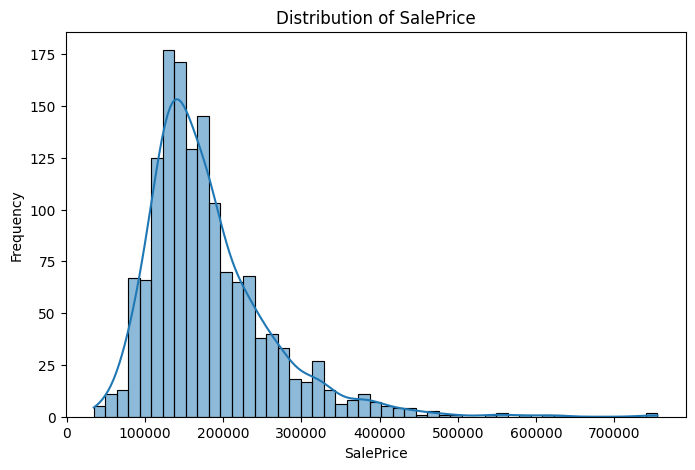

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

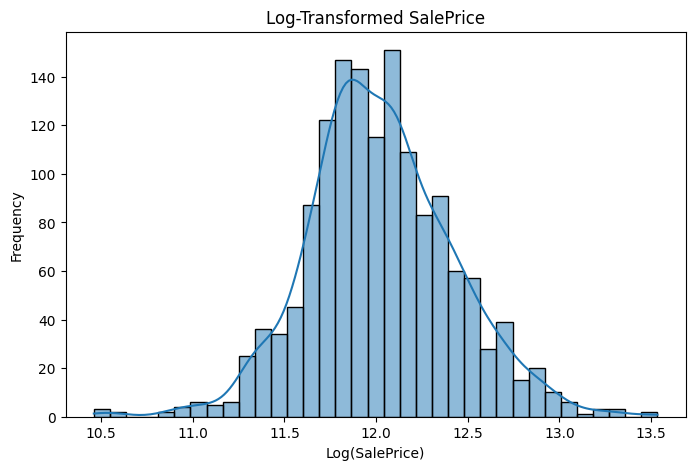

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df['SalePrice']), kde=True)
plt.title('Log-Transformed SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()

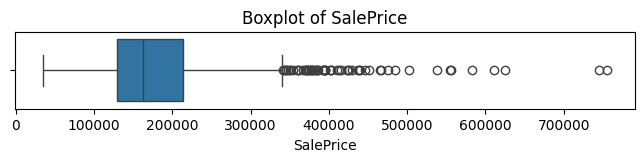

In [12]:
plt.figure(figsize=(8, 1))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.show()

After an initial look at our target variable **SalePrice** we can see a right-skewed distribution.  
This is to be expected as most houses will sell around the same price with the more expensive ones being fewer in number.

## 2. Missing values analysis

Now lets look at which features have missing values and how many each have.

In [13]:
df.isnull().sum().sort_values(ascending=False)[lambda x: x > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageType        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
dtype: int64


As per the data_description.txt file, many of these features use NA as intented value, meaning "None".  
But there are other variables where that is not the case, like **GarageYrBlt** or **MasVnrArea**.  

As there are not that many features, lets explore them manually and deal with them accordingly.

**PoolQC** is a categorical variable which describes the quality of the pool, NA is not one of the categories but given that there is no category for "No pool", those 1453 missing values should mean that those 1453 houses have no pool.  

We can confirm this looking at how many houses have 0 pool area and checking if those entries are the same as the ones with **PoolQC** missing values.

In [14]:
(df['PoolArea'] == 0).sum()

np.int64(1453)

In [15]:
df[(df['PoolArea'] == 0) & (df['PoolQC'].isnull())].shape

(1453, 80)

Now lets transform empty values into a string "None" to avoid issues with missing values downstream.

In [16]:
df['PoolQC'] = df['PoolQC'].fillna('None')
df['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

**MiscFeature** is also a categorical variable with NA as intended value for None, lets compare it with **MiscVal** which represents the value of said feature.

In [17]:
(df['MiscVal'] == 0).sum()

np.int64(1408)

In [18]:
df[(df['MiscVal'] == 0) & (df['MiscFeature'].isnull())].shape

(1406, 80)

There seems to be 2 instances of **MiscVal** 0 more than the number of entries with **MiscFeature** as NA.  

In [19]:
df[(df['MiscVal'] == 0) & (df['MiscFeature'].notna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
873,40,RL,60.0,12144,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1949,1950,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,Rec,375,Unf,0,457,832,GasA,Gd,Y,SBrkr,1036,0,232,1268,0,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1949.0,Unf,1,288,TA,TA,Y,0,28,0,0,0,0,None,NaN,Othr,0,9,2009,WD,Normal,133000
1200,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,864,864,GasA,Gd,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1972.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,None,NaN,Shed,0,7,2006,Oth,Abnorml,116050


As there are only 2 entries, we will drop them and replace the NA values of the rest of **MiscFeature** with "None".

In [20]:
df = df.drop(index=df[(df['MiscVal'] == 0) & (df['MiscFeature'].notna())].index)

In [21]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

Both **Alley** and **Fence** also use NA as None. This time there is no information to crosscheck, so we will assume all NA values are correct.

In [22]:
df['Alley'] = df['Alley'].fillna('None')
df['Alley'].unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

In [23]:
df['Fence'] = df['Fence'].fillna('None')
df['Fence'].unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

**MasVnrType** is a categorical variable that describes the type of masonry veneer, and **MasVnrArea** is a numerical variable that measures its area in square feet.  
For the type there is a None category but with None instead of NA. Lets check its values:

In [24]:
(df['MasVnrArea'] == 0).sum()

np.int64(859)

In [25]:
df['MasVnrArea'].isnull().sum()

np.int64(8)

In [26]:
df['MasVnrType'].isnull().sum()

np.int64(870)

There seems to be some type of inconsistency here, as we have 870 missing values on **MasVnrType**, 8 missing values on **MasVnrArea**, and 859 values of 0 area.  
We should first check which rows have unexpected values.

In [27]:
df[(df['MasVnrArea'] > 0) & (df['MasVnrType'].isnull())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,60,RL,80.0,10400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,NaN,288.0,TA,TA,CBlock,TA,TA,No,Rec,247,Unf,0,485,732,GasA,Gd,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2,484,TA,TA,Y,148,0,0,0,147,0,None,None,None,0,11,2006,WD,Normal,165150
773,20,RL,70.0,10150,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,7,2007,COD,Normal,114500
1230,90,RL,NaN,18890,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,None,None,Gar2,8300,8,2007,WD,Normal,190000
1300,60,RL,NaN,10762,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,NaN,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2009,WD,Normal,225000
1334,160,RM,24.0,2368,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,NaN,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,None,None,None,0,5,2009,WD,Normal,125000


In [28]:
df[(df['MasVnrArea'].isnull())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,None,None,None,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,None,None,None,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,None,None,None,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,None,None,None,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,None,None,None,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,None,None,None,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,None,None,None,0,3,2008,WD,Normal,237000


In [29]:
df[(df['MasVnrArea'] == 0) & ~(df['MasVnrType'].isnull())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
688,20,RL,60.0,8089,Pave,None,Reg,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,6,2007,2007,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,945,Unf,0,474,1419,GasA,Ex,Y,SBrkr,1419,0,0,1419,1,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,2,567,TA,TA,Y,140,0,0,0,0,0,None,None,None,0,10,2007,New,Partial,392000
1241,20,RL,83.0,9849,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,6,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1689,1689,GasA,Ex,Y,SBrkr,1689,0,0,1689,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,3,954,TA,TA,Y,0,56,0,0,0,0,None,None,None,0,6,2007,New,Partial,248328


We can see 4 different cases here:  
> 8 entries where both type and area are NA  
> 2 entries where type is NA but where the area is 1.0, which would not make sense as that area value is too small  
> 3 entries where type is NA but where the area has a reasonable value  
> 2 entries where there is a valid type but the area is 0  

We are going to drop the entries with both values missing, and the two with 1.0 as area, because they are only 10 entries (<1% of the total).  

As for the other two cases, we are going to replace the missing values with the mode of the type from its neighborhood, and with the median of the neighborhood of the area.

In [30]:
df = df.drop(index=df[(df['MasVnrType'].isnull()) & (df['MasVnrArea'].isnull())].index)
df = df.drop(index=df[(df['MasVnrArea'] == 1.0)].index)

In [31]:
# Create boolean mask for those rows where MasVnrType is NaN and MasVnrArea is not 0
mask1 = df['MasVnrType'].isna() & (df['MasVnrArea'] != 0)

# Create boolean mask for those rows where MasVnrType has a valid value and MasVnrArea is 0
mask2 = ~df['MasVnrType'].isna() & (df['MasVnrArea'] == 0)

# Group by Neighborhood and get the mode of MasVnrType by Neighborhood and the median of MasVnrArea.
MasVnrType_mode_Neighborhood = (df.groupby('Neighborhood')['MasVnrType'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'None'))
MasVnrArea_median_Neighborhood = df.groupby('Neighborhood')['MasVnrArea'].median()

# Map the mode values to the original DataFrame
df.loc[mask1, 'MasVnrType'] = df.loc[mask1, 'Neighborhood'].map(MasVnrType_mode_Neighborhood)
df.loc[mask2, 'MasVnrArea'] = df.loc[mask2, 'Neighborhood'].map(MasVnrArea_median_Neighborhood)

Lets check whether all the missing values remaining matches the number of properties without masonry veneer.

In [32]:
print(df['MasVnrType'].isnull().sum())
print((df['MasVnrArea'] == 0).sum())
df[(df['MasVnrArea'] == 0) & ~(df['MasVnrType'].isnull())]

857
858


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
688,20,RL,60.0,8089,Pave,None,Reg,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,6,2007,2007,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,945,Unf,0,474,1419,GasA,Ex,Y,SBrkr,1419,0,0,1419,1,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,2,567,TA,TA,Y,140,0,0,0,0,0,None,None,None,0,10,2007,New,Partial,392000


We can see there is still an entry with valid veneer type but area 0, this means that the median of that neighborhood is 0.  
As it is only one entry, our safest approach is to just drop this one entry.

In [33]:
df = df.drop(index=df[(df['MasVnrArea'] == 0) & ~(df['MasVnrType'].isnull())].index)

Now we will replace the NA values in type by 'None'.

In [34]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

**FireplaceQu** has NA as None, and the amount should match the amount of 0 **Fireplaces**.  
If so, we will just replace those NA with "None".

In [35]:
(df['FireplaceQu'].isnull()).sum()

np.int64(684)

In [36]:
(df['Fireplaces'] == 0).sum()

np.int64(684)

In [37]:
df[(df['Fireplaces'] == 0) & (df['FireplaceQu'].isnull())].shape

(684, 80)

In [38]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['FireplaceQu'].unique()

array(['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

**LotFrontage** shows the linear feet of street connected to the house.  
As there is a big number of missing values (~17%), dropping them would not be reasonable.  
Instead, we will replace those values by the median of the neighborhood.

In [39]:
# Create boolean mask for those rows where LotFrontage is NA.
mask = df['LotFrontage'].isna()

# Group by Neighborhood and get the mode of LotFrontage by Neighborhood
LotFrontage_median_Neighborhood = df.groupby('Neighborhood')['LotFrontage'].median()

# Map the mode values to the original DataFrame
df.loc[mask, 'LotFrontage'] = df.loc[mask, 'Neighborhood'].map(LotFrontage_median_Neighborhood)

In [40]:
(df['LotFrontage'].isnull()).sum()

np.int64(0)

Now we will check the garage related variables.
We have 81 missing values on **GarageQual, GarageType, GarageFinish, GarageYrBlt, GarageExposure**.  
All those are categorical and have NA as legitimate value for "no garage", except **GarageYrBlt** which is numerical (year the garage was built).  

Besides those, we can see two more variables related to the garage, **GarageArea** and **GarageCars** which are numerical variables.

Now we should check that those 81 missing values on each feature, they all match 81 unique entries, that at the same time should have all of them 0 in both Area and Cars.

In [41]:
(df['GarageCars'] == 0).sum()

np.int64(81)

In [42]:
(df['GarageArea'] == 0).sum()

np.int64(81)

In [43]:
df[(df['GarageArea'] == 0) & (df['GarageCars'] == 0) & (df['GarageQual'].isnull()) & (df['GarageType'].isnull()) & (df['GarageFinish'].isnull()) & (df['GarageCond'].isnull()) & (df['GarageYrBlt'].isnull())].shape

(81, 80)

After checking this we can safely replace NA values on the categorical variables with "None", and for **GarageYrBlt** we will replace with -1 as a placeholder to indicate there is no garage.

In [44]:
for var in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[var] = df[var].fillna('None')
    print(f"Unique values in {var}: {df[var].unique()}")
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(-1)
(df['GarageYrBlt'] == -1).sum()

Unique values in GarageType: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'None' 'Basment' '2Types']
Unique values in GarageFinish: ['RFn' 'Unf' 'Fin' 'None']
Unique values in GarageQual: ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
Unique values in GarageCond: ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']


np.int64(81)

As far as basement related variables, we have 11 in total:
> **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2**, these 5 categorical features use NA as value for "no basement", and those are the ones that show missing values.  
> **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF**, these 4 numerical features describe the area in square feet of the different sections of the basement, they have no missing values.  
> **BsmtFullBath, BsmtHalfBath**, these 2 numerical features describe the amount of full and half bathrooms that there are in the basement, they have no missing values.  

We expect to see that those entries with missing values in all 5 categorical features, should have 0 as value in all the numerical variables.  
First we will check that and replace the missing values with "None" and then we can focus in the rest of the missing values.

In [45]:
BsmtCatCols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
mask = df[BsmtCatCols].isnull().all(axis=1)

print("Basement 1 area: ", 
      df[mask]["BsmtFinSF1"].value_counts())

print("Basement 2 area: ", 
      df[mask]["BsmtFinSF2"].value_counts())

print("Unfinished basement area: ", 
      df[mask]["BsmtUnfSF"].value_counts())

print("Basement total area: ", 
      df[mask]["TotalBsmtSF"].value_counts())

print("Basement full bathrooms: ", 
      df[mask]["BsmtFullBath"].value_counts())

print("Basement half bathrooms: ", 
      df[mask]["BsmtHalfBath"].value_counts())

Basement 1 area:  BsmtFinSF1
0    37
Name: count, dtype: int64
Basement 2 area:  BsmtFinSF2
0    37
Name: count, dtype: int64
Unfinished basement area:  BsmtUnfSF
0    37
Name: count, dtype: int64
Basement total area:  TotalBsmtSF
0    37
Name: count, dtype: int64
Basement full bathrooms:  BsmtFullBath
0    37
Name: count, dtype: int64
Basement half bathrooms:  BsmtHalfBath
0    37
Name: count, dtype: int64


With that we can safely replace in those 37 entries the missing value with "None".

In [46]:
df.loc[mask, BsmtCatCols] = df.loc[mask, BsmtCatCols].fillna('None')

Lets check what missing values remain.

In [47]:
df.isnull().sum().sort_values(ascending=False)[lambda x: x > 0]

BsmtFinType2    1
Electrical      1
BsmtExposure    1
dtype: int64

In [48]:
df[df["BsmtExposure"].isnull() | df["BsmtFinType2"].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,RL,85.0,10655,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,10,2009,WD,Normal,284000
948,60,RL,65.0,14006,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,None,None,None,0,2,2006,WD,Normal,192500


We can see that there is one entry with **BsmtFinType2** empty even though there is surface area and the other values make sense, and another entry where **BsmtExposure**'s value is missing even though the rest of the values indicate that there is an unfinished basement. Both cases seem to be missing information, not empty on purpose.  

Given that it is only 2 entries, we will drop them.

In [49]:
df = df.drop(index=df[df["BsmtExposure"].isnull() | df["BsmtFinType2"].isnull()].index)

As for the entry with the **Electrical** feature missing, we will drop it too.

In [50]:
df = df.drop(index=df[df["Electrical"].isnull()].index)

Before we proceed lets check all missing values have been dealt with:

In [51]:
df.isnull().sum().sort_values(ascending=False)[lambda x: x > 0]

Series([], dtype: int64)

An empty list means there are no more missing values in our data.

In [52]:
df.shape

(1444, 80)

We have lost in total 16 rows (~1%), but now we have a clean dataset that will not give us problems when we implement any models that cannot deal with missing values natively.

Lets save the cleaned dataset into a CSV file before proceeding with the next steps.

In [53]:
output_path = '../data/processed/train_clean.csv'  # Output file path
df.to_csv(output_path, index=False)